In [1]:
import os
import tensorflow as tf

from tensorflow.keras import backend as K

import matplotlib.pylab as plt

from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *


os.environ["CUDA_VISIBLE_DEVICES"]="0"

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pwd

'/root/gcubme_ai/Workspace/JG_Jeong/IMT_Segmentation/code/Module'

In [ ]:
'../data/data_set_7/SONON/dcm/11084213/00002070_20210615/0001_19700101_000000/IN_00001_0000044551.dcm'

In [3]:
a = [10, 0]

np.min(np.array(a))

0

In [4]:
def dice_coef(y_true, y_pred, smooth=0.001):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)


get_custom_objects().update({
   
    'dice_coef' : dice_coef,
    'dice_coef_loss' : dice_coef_loss,
        
})

In [4]:
image = np.load('../data/data_set_7/NPY/SONON/processing/SONON_image.npy')
label = np.load('../data/data_set_7/NPY/SONON/processing/SONON_label.npy')

In [6]:
model = load_model('../result/model_save/model_IMT_data_set_7_SONON.h5')

OSError: SavedModel file does not exist at: ../result/model_save/model_IMT_data_set_7_SONON.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
model_1 = tf.lite.Interpreter('./Module/model_IMT_data_set_7_SONON_lite.tflite')

In [6]:
model_1.allocate_tensors()

In [7]:
input_details = model_1.get_input_details()
output_details = model_1.get_output_details()

In [8]:
input_details

[{'name': 'input_1',
  'index': 1,
  'shape': array([  1, 512, 512,   1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [9]:
# Test model on random input data.
input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data = np.expand_dims(image[-2], axis=0) / 255

In [10]:
model_1.set_tensor(input_details[0]['index'], input_data)

In [11]:
model_1.invoke()

In [12]:
output_data = model_1.get_tensor(output_details[0]['index'])

In [19]:
output_data = (output_data > 0.5) * 1

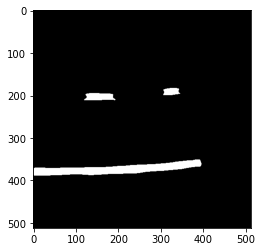

In [20]:
plt.figure()

plt.imshow(output_data[0], cmap='gray')

In [21]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
tflite_model = converter.convert()

# Save the model.
with open('../Module/model_IMT_data_set_7_SONON_lite.tflite', 'wb') as f:
    
    f.write(tflite_model)

In [4]:
def convert_model(model_path, save_model_path, model_name):
    
    
    model = load_model(model_path)
    
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    with open(save_model_path + model_name + '.tflite', 'wb') as f:

        f.write(tflite_model)

In [6]:
convert_model('../../result/model_save/model_IMT_data_set_7_SONON.h5', '../Module/', 'test')